In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import pickle

In [3]:
data = pd.read_csv("amsterdam.csv")
data.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [4]:
data = data[["Area", "Room", "Lon", "Lat", "Price"]]
data.head()

,Area,Room,Lon,Lat,Price
0,64,3,4.907736,52.356157,685000.0
1,60,3,4.850476,52.348586,475000.0
2,109,4,4.944774,52.343782,850000.0
3,128,6,4.789928,52.343712,580000.0
4,138,5,4.902503,52.410538,720000.0


In [5]:
#Shape is an attribute, not a method.
data.shape 

(924, 5)

In [6]:
data.isnull().sum()

Area     0
Room     0
Lon      0
Lat      0
Price    4
dtype: int64

In [7]:
data = data.dropna()

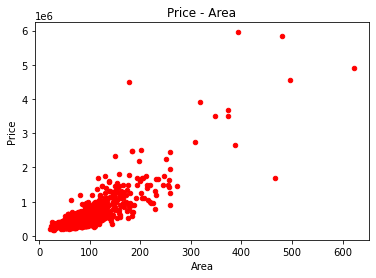

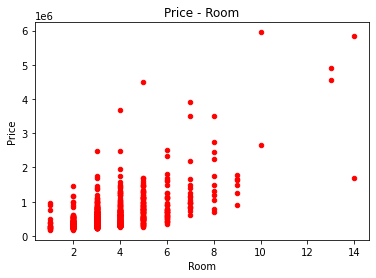

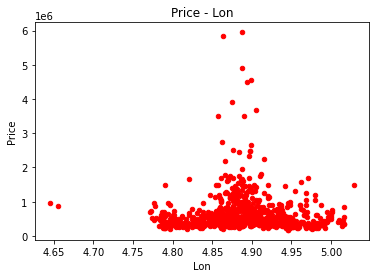

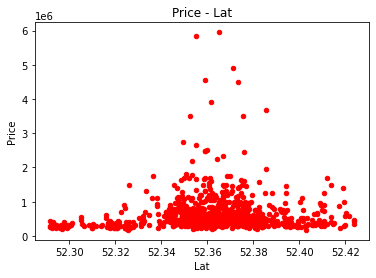

In [8]:
#data.columns is a list contains the indices of each column.
for i in range(0, len(data.columns) - 1):
    data.plot(kind = "scatter", x = data.columns[i], y = data.columns[-1], color = "red")
    plt.title(data.columns[-1] + " - " + data.columns[i])
    plt.show()

In [9]:
y_data = data["Price"]
y_data.head()

0    685000.0
1    475000.0
2    850000.0
3    580000.0
4    720000.0
Name: Price, dtype: float64

In [10]:
x_data = data.drop(columns = ["Price"])
x_data

,Area,Room,Lon,Lat
0,64,3,4.907736,52.356157
1,60,3,4.850476,52.348586
2,109,4,4.944774,52.343782
3,128,6,4.789928,52.343712
4,138,5,4.902503,52.410538
...,...,...,...,...
919,117,1,4.927757,52.354173
920,72,3,4.890612,52.414587
921,51,3,4.856935,52.363256
922,113,4,4.965731,52.375268


In [11]:
#Transfrom the data of the Price columns into a numpy array.
y_predict = np.array(data["Price"])
y_predict

array([ 685000.,  475000.,  850000.,  580000.,  720000.,  450000.,
        450000.,  590000.,  399000.,  300000.,  540000.,  539000.,
        390000.,  575000.,  650000.,  475000.,  700000.,  325000.,
        399000.,  375000., 1625000.,  575000.,  600000.,  525000.,
        350000.,  350000.,  575000.,  375000., 1650000.,  325000.,
        800000., 1950000.,  735000., 3925000.,  475000.,  275000.,
        375000.,  570000.,  375000.,  895000.,  365000.,  550000.,
        325000.,  429000.,  650000.,  350000.,  475000.,  325000.,
        425000.,  350000.,  350000.,  375000.,  450000., 1185000.,
        385000.,  687500.,  585000., 1295000.,  375000.,  500000.,
        300000.,  375000.,  400000.,  850000.,  550000.,  275000.,
        330000.,  700000.,  500000.,  369000.,  245000.,  350000.,
        425000.,  375000.,  335000.,  450000.,  395000.,  300000.,
        450000.,  415000.,  650000.,  425000.,  469000.,  485000.,
        225000.,  285000.,  995000., 1475000.,  475000.,  4750

In [12]:
#Transform each row of x_data into an 1D array, then the rows will be formed in to a 2D array.
X = np.array(x_data)
X

array([[ 64.      ,   3.      ,   4.907736,  52.356157],
       [ 60.      ,   3.      ,   4.850476,  52.348586],
       [109.      ,   4.      ,   4.944774,  52.343782],
       ...,
       [ 51.      ,   3.      ,   4.856935,  52.363256],
       [113.      ,   4.      ,   4.965731,  52.375268],
       [ 79.      ,   4.      ,   4.810678,  52.355493]])

In [13]:
#Split up 10% of the train data into test sample.
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y_predict, test_size = 0.1)
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
accuracy = linear.score(x_test, y_test)
accuracy

0.7891719900167342

In [14]:
for i in range (0, len(data.columns) - 1):
    print("Linear Coefficient of " + data.columns[i] + ": ", linear.coef_[i])
#The bigger the coefficient is, the more weight the attribute has.

Linear Coefficient of Area:  8599.344106076262
Linear Coefficient of Room:  -57136.50958633023
Linear Coefficient of Lon:  -270443.4623776216
Linear Coefficient of Lat:  960617.5170530818


In [15]:
print("Linear Intercept: ", linear.intercept_)

Linear Intercept:  -48981178.87948857


In [16]:
predictions = linear.predict(x_test)
for i in range (len(predictions)):
    print("Prediction value:", predictions[i], ", Actual value: ", y_test[i], ", Error: ", 
          (200 * abs(predictions[i] - y_test[i]))/(predictions[i] + y_test[i]), "%")

Prediction value: 560440.6036045626 , Actual value:  760000.0 , Error:  30.22618296509159 %
Prediction value: 298584.4804695621 , Actual value:  475000.0 , Error:  45.60989109382197 %
Prediction value: 357410.1861002147 , Actual value:  385000.0 , Error:  7.432498749703591 %
Prediction value: 479725.8288669884 , Actual value:  425000.0 , Error:  12.097770865130046 %
Prediction value: 1393519.8283273056 , Actual value:  2475000.0 , Error:  55.91183293173459 %
Prediction value: 346968.08331056684 , Actual value:  250000.0 , Error:  32.486856842602805 %
Prediction value: 812280.206116192 , Actual value:  825000.0 , Error:  1.553771167121198 %
Prediction value: 547084.0451304018 , Actual value:  325000.0 , Error:  50.93179868855274 %
Prediction value: 726708.4480151013 , Actual value:  539000.0 , Error:  29.660613913017304 %
Prediction value: 467908.6639396548 , Actual value:  500000.0 , Error:  6.631067011989457 %
Prediction value: 272946.12503890693 , Actual value:  325000.0 , Error:  17

In [17]:
#save the model using "pickle" library

with open("AmsterdamHousePrice.pickle", "wb") as f:
    pickle.dump(linear, f)

In [18]:
#read the saved model.
ahp_pickle_read = open("AmsterdamHousePrice.pickle", "rb")
lin_reg = pickle.load(ahp_pickle_read)

In [19]:
#confirm the accuracy score of the saved model
lin_reg.score(x_test, y_test)

0.7891719900167342

In [22]:
#test multiple times and save the best result.
best_accuracy_score = 0.9
for i in range(1000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y_predict, test_size = 0.1)
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(x_train, y_train)
    accuracy_score = lin_reg.score(x_test, y_test)
    if(accuracy_score > best_accuracy_score):
        best_accuracy_score = accuracy_score
        with open("AmsterdamHousePrice.pickle", "wb") as f:
            print("saving model.")
            pickle.dump(lin_reg, f)
        print("New best score: ", accuracy_score)
        #break right after it gets a model with an accuracy > 0.9, otherwise the next time
        #it gets the best score, the saved model's accuracy score will be a random value (unknown reason)
        break
    else:
        print(accuracy_score)

#test if the best model is saved
if(lin_reg.score(x_test, y_test) == best_accuracy_score):
    print("yes")
#print out the best score.
ahp_pickle_read = open("AmsterdamHousePrice.pickle", "rb")
lin_reg = pickle.load(ahp_pickle_read)
print("The Best Accuracy Score: ", lin_reg.score(x_test, y_test))

0.6792718190619638
0.2982640840911246
0.6783402379734109
0.7672598258877515
0.6578732313291966
0.6532553690621854
0.8143853765990314
0.745243409759058
0.5173658223034182
0.5928431620454425
0.8212622976941952
0.8278922876926718
0.6527458820644962
0.5233409954648135
0.7510257750345264
0.3187430659106065
0.6334929253620196
0.5975007312336331
0.7614261851505675
0.6520822564940416
0.504837465962449
0.39267574656158244
0.6296983528717487
0.6424083063376858
0.6798148089467189
0.5592065035116371
0.48312848066120617
0.7354334776331122
0.8023566718348252
0.8206274368684111
0.5675942468887458
0.4034289007083931
0.5333608754762391
0.4431555783251382
0.5476779827247253
0.8087415032302978
0.6215606168259982
saving model.
New best score:  0.9321369359025031
yes
The Best Accuracy Score:  0.9321369359025031


In [24]:
predictions = lin_reg.predict(x_test)
for i in range (len(predictions)):
    print("Prediction value:", predictions[i], ", Actual value: ", y_test[i], ", Error: ", 
          (200 * abs(predictions[i] - y_test[i]))/(predictions[i] + y_test[i]), "%")
print("Accuracy Score: ", lin_reg.score(x_test, y_test))

Prediction value: 352745.5704385191 , Actual value:  365000.0 , Error:  3.414700157325617 %
Prediction value: 539473.8825881481 , Actual value:  315000.0 , Error:  52.54084113331369 %
Prediction value: 258769.70245337486 , Actual value:  230000.0 , Error:  11.772293703544069 %
Prediction value: 905861.2542726398 , Actual value:  900000.0 , Error:  0.6491367217467139 %
Prediction value: 286588.86842834204 , Actual value:  400000.0 , Error:  33.03611135766453 %
Prediction value: 288318.4885973111 , Actual value:  350000.0 , Error:  19.326249358132333 %
Prediction value: 712168.749656409 , Actual value:  450000.0 , Error:  45.117156993580885 %
Prediction value: 477165.04024757445 , Actual value:  585000.0 , Error:  20.304746563168916 %
Prediction value: 4893353.505274333 , Actual value:  4900000.0 , Error:  0.13573480671533786 %
Prediction value: 551747.0581171885 , Actual value:  325000.0 , Error:  51.72462365693638 %
Prediction value: 201310.5803413242 , Actual value:  369000.0 , Error: